In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('./titanic/train.csv')
train, test = train_test_split(titanic, test_size=0.2, random_state=39)

In [3]:
titanic["Survived"].mean()

0.3838383838383838

[タイタニック号の乗客の生存予測〜80%以上の予測精度を超える方法（探索的データ解析編） │ キヨシの命題](https://yolo-kiyoshi.com/2018/12/16/post-951/)

ここを参考にデータの傾向を見てみる

# Analyze Pclass

In [5]:
titanic["Survived"].groupby(titanic["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [42]:
_titanic = titanic[["Survived", "Pclass"]]

survived_pclass_count = _titanic.query("Survived == 1")["Pclass"].value_counts().sort_index(0).rename("Survived")
# survived_pclass_count.plot(kind="bar")

dead_pclass_count = _titanic.query("Survived == 0")["Pclass"].value_counts().sort_index(0).rename("Dead")
# dead_pclass_count.plot(kind="bar")

In [43]:
pclass_count = pd.DataFrame([survived_pclass_count, dead_pclass_count]).transpose()
pclass_count

,Survived,Dead
1,136,80
2,87,97
3,119,372


<AxesSubplot:>

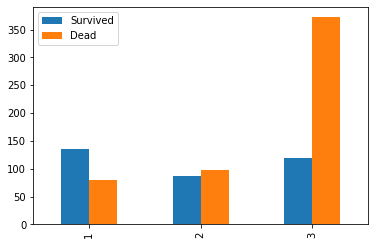

In [44]:
pclass_count.plot(kind="bar")

# Analyze Fare

In [49]:
min = titanic["Fare"].min()
max = titanic["Fare"].max() 
min, max

(0.0, 512.3292)

In [61]:
# pd.cut(titanic["Fare"], 10)
pd.cut(titanic["Fare"], np.arange(0, 550, 50))

0        (0, 50]
1      (50, 100]
2        (0, 50]
3      (50, 100]
4        (0, 50]
         ...    
886      (0, 50]
887      (0, 50]
888      (0, 50]
889      (0, 50]
890      (0, 50]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[int64]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (300, 350] < (350, 400] < (400, 450] < (450, 500]]

In [72]:
titanic.groupby(pd.cut(titanic["Fare"], np.arange(0.0, 600.0, 50))).size()

Fare
(0.0, 50.0]       716
(50.0, 100.0]     107
(100.0, 150.0]     24
(150.0, 200.0]      9
(200.0, 250.0]     11
(250.0, 300.0]      6
(300.0, 350.0]      0
(350.0, 400.0]      0
(400.0, 450.0]      0
(450.0, 500.0]      0
(500.0, 550.0]      3
dtype: int64

In [73]:
survived = _titanic.query("Survived == 1")
dead = _titanic.query("Survived == 0")

In [74]:
pd.cut(titanic["Fare"], np.arange(0.0, 600.0, 50))

0        (0.0, 50.0]
1      (50.0, 100.0]
2        (0.0, 50.0]
3      (50.0, 100.0]
4        (0.0, 50.0]
           ...      
886      (0.0, 50.0]
887      (0.0, 50.0]
888      (0.0, 50.0]
889      (0.0, 50.0]
890      (0.0, 50.0]
Name: Fare, Length: 891, dtype: category
Categories (11, interval[float64]): [(0.0, 50.0] < (50.0, 100.0] < (100.0, 150.0] < (150.0, 200.0] ... (350.0, 400.0] < (400.0, 450.0] < (450.0, 500.0] < (500.0, 550.0]]

In [80]:
with_fare_range = titanic.assign(FareRange=pd.cut(titanic["Fare"], np.arange(0.0, 600.0, 50)))[["Survived", "FareRange"]]
with_fare_range

,Survived,FareRange
0,0,"(0.0, 50.0]"
1,1,"(50.0, 100.0]"
2,1,"(0.0, 50.0]"
3,1,"(50.0, 100.0]"
4,0,"(0.0, 50.0]"
...,...,...
886,0,"(0.0, 50.0]"
887,1,"(0.0, 50.0]"
888,0,"(0.0, 50.0]"
889,1,"(0.0, 50.0]"


In [82]:
survived_fare_range_count = with_fare_range.query("Survived == 1")["FareRange"].value_counts().sort_index(0).rename("Survived")
dead_fare_range_count = with_fare_range.query("Survived == 0")["FareRange"].value_counts().sort_index(0).rename("Dead")

In [84]:
fare_range_count = pd.DataFrame([survived_fare_range_count, dead_fare_range_count]).transpose()
fare_range_count

,Survived,Dead
"(0.0, 50.0]",232,484
"(50.0, 100.0]",70,37
"(100.0, 150.0]",19,5
"(150.0, 200.0]",6,3
"(200.0, 250.0]",7,4
"(250.0, 300.0]",4,2
"(300.0, 350.0]",0,0
"(350.0, 400.0]",0,0
"(400.0, 450.0]",0,0
"(450.0, 500.0]",0,0


<AxesSubplot:>

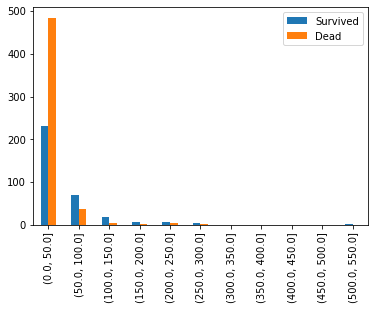

In [86]:
fare_range_count.plot(kind="bar")

<AxesSubplot:>

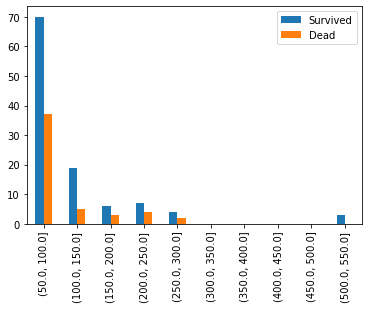

In [97]:
fare_range_count.drop(pd.Interval(left=0.0, right=50.0)).plot(kind="bar")

In [103]:
titanic["Fare"].skew()

4.787316519674893

In [114]:
np.log1p(titanic["Fare"]).skew()

0.3949280095189306

In [115]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Train model with these analysis

In [141]:
%run "./age-filter.py"
%run "./baby-appender.py"
%run "./cabin-converter.py"

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

class FamilySizeAppender(BaseEstimator, TransformerMixin):

  def __init__(self):
    return

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    return X.assign(Family=X["Parch"] + X["SibSp"] + 1)


In [125]:
from sklearn.base import BaseEstimator, TransformerMixin

class NDFareAppender(BaseEstimator, TransformerMixin):

  def __init__(self, limit=5):
    self.limit = limit 
    return

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    return X.assign(Fare_nd=np.log1p(X["Fare"]))


In [137]:
_titanic = FamilySizeAppender().fit_transform(titanic)
# _titanic
# _titanic["Family"]
pd.cut(_titanic["Family"], [0, 1, 4, 7, np.Infinity], labels=['solo', 'small', 'middle', 'large'])

0      small
1      small
2       solo
3      small
4       solo
       ...  
886     solo
887     solo
888    small
889     solo
890     solo
Name: Family, Length: 891, dtype: category
Categories (4, object): ['solo' < 'small' < 'middle' < 'large']

In [189]:
from sklearn.base import BaseEstimator, TransformerMixin

class Binner(BaseEstimator, TransformerMixin):

  def __init__(self):
    return

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    _X = X.assign(Family_bin=pd.cut(_titanic["Family"], [0, 1, 4, 7, np.Infinity], labels=['solo', 'small', 'middle', 'large']))
    _X = _X.assign(Age_bin=pd.cut(X["Age"], np.arange(0, 100, 5)))
    _X = _X.assign(Fare_nd_bin=pd.cut(X["Fare_nd"], np.arange(0, 600, 50)))
    return _X


In [190]:
from sklearn.pipeline import Pipeline

dataframe_pipeline = Pipeline([
  ('baby', BabyAppender(limit=20)),
  ('cabin', CabinConverter()),
  ('group', FamilySizeAppender()),
  ('fare', NDFareAppender()),
  ('bin', Binner()),
])

In [191]:
dataframe_pipeline.fit_transform(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Baby,Floor,CabinNumber,Family,Fare_nd,Family_bin,Age_bin,Fare_nd_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,NaN,NaN,2,2.110213,small,"(20.0, 25.0]","(0, 50]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,C,85.0,2,4.280593,small,"(35.0, 40.0]","(0, 50]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,NaN,NaN,1,2.188856,solo,"(25.0, 30.0]","(0, 50]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,C,123.0,2,3.990834,small,"(30.0, 35.0]","(0, 50]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,NaN,NaN,1,2.202765,solo,"(30.0, 35.0]","(0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,False,NaN,NaN,1,2.639057,solo,"(25.0, 30.0]","(0, 50]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,True,B,42.0,1,3.433987,solo,"(15.0, 20.0]","(0, 50]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,False,NaN,NaN,4,3.196630,small,NaN,"(0, 50]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,False,C,148.0,1,3.433987,solo,"(25.0, 30.0]","(0, 50]"


In [225]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cabins = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', np.nan]

scaler_pipeline = Pipeline([
  ('imputer', SimpleImputer()),
  ('std_scaler', StandardScaler()),
])

col_transformer = ColumnTransformer([ 
  ("onehot", OneHotEncoder(), ["Pclass", "Sex", "Family_bin", "Fare_nd_bin", "Age_bin"]),
  ("floor", OneHotEncoder(categories=[cabins]), ["Floor"]),
  ("passthrough", "passthrough", ["Baby"]),
])

In [226]:
whole_pipeline = Pipeline([
  ('dataframe', dataframe_pipeline),
  ('std_scaler', col_transformer),
])

In [227]:
y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)

y_test = test["Survived"]
X_test = test.drop("Survived", axis=1)

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

_X_train = whole_pipeline.fit_transform(X_train)
clf = RandomForestClassifier(random_state=38)
clf.fit(_X_train, y_train)
cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")

array([0.83613445, 0.79324895, 0.82278481])

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  { 
    # "criterion": ["gini", "entropy"],
    # "class_weight": ["balanced"],
    # "max_features": ["sqrt", "log2"],
    "max_features": ["sqrt", 2, 4, 8, 16],
    "min_samples_split": [2, 4, 8, 16],
    "n_estimators": [50, 100, 150],
  }
]

grid_search = GridSearchCV(
  RandomForestClassifier(random_state=38),
  param_grid,
  cv=5,
  scoring="accuracy",
  return_train_score=True)
grid_search.fit(_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid=[{'max_features': ['sqrt', 2, 4, 8, 16],
                          'min_samples_split': [2, 4, 8, 16],
                          'n_estimators': [50, 100, 150]}],
             return_train_score=True, scoring='accuracy')

In [230]:
grid_search.best_score_, grid_search.best_params_

(0.8215207327883384,
 {'max_features': 8, 'min_samples_split': 16, 'n_estimators': 100})

In [231]:
_X_test = whole_pipeline.fit_transform(X_test)
cross_val_score(grid_search.best_estimator_, _X_test, y_test, cv=3, scoring="accuracy")

array([0.8       , 0.83333333, 0.79661017])

In [232]:
titanic_test = pd.read_csv('./titanic/test.csv')

In [233]:
_titanic_test = whole_pipeline.fit_transform(titanic_test)
predict = grid_search.best_estimator_.predict(_titanic_test)

id = np.array(titanic_test["PassengerId"]).astype(int)
df = pd.DataFrame(predict, id, columns = ["Survived"])
df.to_csv("./titanic/predict-6.csv", index_label = ["PassengerId"])

In [222]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [223]:
rfc = grid_search.best_estimator_
rfc.feature_importances_

array([0.03904487, 0.02832632, 0.06710554, 0.17941729, 0.17553445,
       0.00683236, 0.01993479, 0.05620738, 0.0321738 , 0.00599879,
       0.00702626, 0.04567253, 0.01298156, 0.00987765, 0.01498534,
       0.01974184, 0.02207793, 0.01743438, 0.0188063 , 0.02207602,
       0.01708331, 0.00702042, 0.00715119, 0.00946089, 0.0022673 ,
       0.00236307, 0.01872718, 0.008823  , 0.01628483, 0.01639715,
       0.01254023, 0.02085118, 0.00556778, 0.0016622 , 0.        ,
       0.05254485])

In [ ]:
["Pclass", "Sex", "Family_bin", "Fare_nd_bin", "Age_bin"]

In [ ]:

plt.figure(figsize=(20,10))
plt.barh(
    _X_train.columns[np.argsort(rfc.feature_importances_)],
    rfc.feature_importances_[np.argsort(rfc.feature_importances_)],
    label='RandomForestClassifier'
)
plt.title('RandomForestClassifier feature importance')

In [239]:
_titanic = dataframe_pipeline.fit_transform(titanic)

onehot = OneHotEncoder()
_titanic_onehot = onehot.fit_transform(_titanic[["Pclass", "Sex", "Family_bin", "Fare_nd_bin", "Age_bin"]])
onehot.categories_, _titanic_onehot.toarray()

([array([1, 2, 3]),
  array(['female', 'male'], dtype=object),
  array(['large', 'middle', 'small', 'solo'], dtype=object),
  array([Interval(0.0, 50.0, closed='right'), nan], dtype=object),
  array([Interval(0.0, 5.0, closed='right'),
         Interval(5.0, 10.0, closed='right'),
         Interval(10.0, 15.0, closed='right'),
         Interval(15.0, 20.0, closed='right'),
         Interval(20.0, 25.0, closed='right'),
         Interval(25.0, 30.0, closed='right'),
         Interval(30.0, 35.0, closed='right'),
         Interval(35.0, 40.0, closed='right'),
         Interval(40.0, 45.0, closed='right'),
         Interval(45.0, 50.0, closed='right'),
         Interval(50.0, 55.0, closed='right'),
         Interval(55.0, 60.0, closed='right'),
         Interval(60.0, 65.0, closed='right'),
         Interval(65.0, 70.0, closed='right'),
         Interval(70.0, 75.0, closed='right'),
         Interval(75.0, 80.0, closed='right'), nan], dtype=object)],
 array([[0., 0., 1., ..., 0., 0., 0.],

Fare_nd_bin の作り方がおかしい。1カテゴリになってる。。

In [243]:
NDFareAppender().fit_transform(titanic)["Fare_nd"].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare_nd, dtype: float64

In [249]:
_titanic = NDFareAppender().fit_transform(titanic)
pd.cut(_titanic["Fare_nd"], 20)

0      (1.872, 2.184]
1      (4.057, 4.369]
2      (2.184, 2.496]
3      (3.745, 4.057]
4      (2.184, 2.496]
            ...      
886    (2.496, 2.808]
887    (3.433, 3.745]
888     (3.12, 3.433]
889    (3.433, 3.745]
890    (1.872, 2.184]
Name: Fare_nd, Length: 891, dtype: category
Categories (20, interval[float64]): [(-0.00624, 0.312] < (0.312, 0.624] < (0.624, 0.936] < (0.936, 1.248] ... (4.993, 5.305] < (5.305, 5.617] < (5.617, 5.929] < (5.929, 6.241]]

<AxesSubplot:>

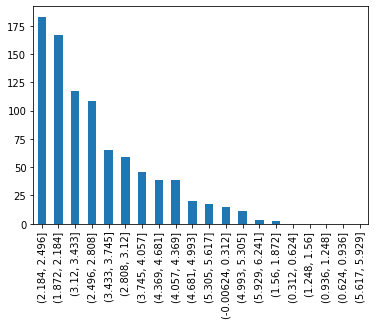

In [255]:
pd.cut(_titanic["Fare_nd"], 20).value_counts().plot(kind="bar")

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin

class Binner(BaseEstimator, TransformerMixin):

  def __init__(self):
    return

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    _X = X.assign(Family_bin=pd.cut(X["Family"], [0, 1, 4, 7, np.Infinity], labels=['solo', 'small', 'middle', 'large']))
    _X = _X.assign(Age_bin=pd.cut(X["Age"], np.arange(0, 100, 5)))
    _X = _X.assign(Fare_nd_bin=pd.cut(X["Fare_nd"], 20))
    return _X


In [262]:
from sklearn.pipeline import Pipeline

dataframe_pipeline = Pipeline([
  ('baby', BabyAppender(limit=20)),
  ('cabin', CabinConverter()),
  ('group', FamilySizeAppender()),
  ('fare', NDFareAppender()),
  ('bin', Binner()),
])

In [263]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cabins = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', np.nan]

scaler_pipeline = Pipeline([
  ('imputer', SimpleImputer()),
  ('std_scaler', StandardScaler()),
])

col_transformer = ColumnTransformer([ 
  ("onehot", OneHotEncoder(), ["Pclass", "Sex", "Family_bin", "Fare_nd_bin", "Age_bin"]),
  ("floor", OneHotEncoder(categories=[cabins]), ["Floor"]),
  ("passthrough", "passthrough", ["Baby"]),
])

In [264]:
whole_pipeline = Pipeline([
  ('dataframe', dataframe_pipeline),
  ('std_scaler', col_transformer),
])

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

_X_train = whole_pipeline.fit_transform(X_train)
clf = RandomForestClassifier(random_state=38)
clf.fit(_X_train, y_train)
cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")

KeyError: 'Family'